In [1]:
import pandas as pd
short_list_sheet = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List.csv")

In [2]:
short_list_sheet.head()

shot  year  tftsrt  tipminf  tTQend Isdata
0  12350  2015     1.5    5.246  5.2248    NaN
1  12372  2015     0.7    3.818  3.8026    NaN
2  12415  2015     1.9    4.769  4.7450    NaN
3  12438  2015     1.1    3.702  3.6826    NaN
4  12481  2015     1.9    5.217  5.1923    NaN

In [4]:
# dataset info
import glob2
PATH = "./dataset/"
dataset_list = ["dur0.1_dis0", "dur0.1_dis5", "dur0.1_dis10"]

for dataset in dataset_list:

    d_path = PATH + dataset

    print("# dataset: ", dataset)
    for dir in ["train", "val", "test"]:
        disruption_dir = glob2.glob(d_path + "/" + dir + "/disruption/*")
        normal_dir = glob2.glob(d_path + "/" + dir + "/normal/*")

        print("data : ", dir, " - disruption : ", len(disruption_dir))
        print("data : ", dir, " - normal : ", len(normal_dir))


# dataset:  dur0.1_dis0
data :  train  - disruption :  48
data :  train  - normal :  6326
data :  val  - disruption :  12
data :  val  - normal :  1583
data :  test  - disruption :  16
data :  test  - normal :  1978
# dataset:  dur0.1_dis5
data :  train  - disruption :  48
data :  train  - normal :  6318
data :  val  - disruption :  12
data :  val  - normal :  1581
data :  test  - disruption :  16
data :  test  - normal :  1976
# dataset:  dur0.1_dis10
data :  train  - disruption :  48
data :  train  - normal :  6303
data :  val  - disruption :  12
data :  val  - normal :  1577
data :  test  - disruption :  16
data :  test  - normal :  1971


In [5]:
from src.dataloader import VideoDataset
from torch.utils.data import DataLoader

batch_size = 1
clip_len = 21
train_data = VideoDataset(dataset = "dur0.1_dis10", split = "train", clip_len = clip_len, preprocess = False, augmentation=True)
train_loader  = DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 4)


/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of train videos: 6351


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


sample_data :  torch.Size([1, 3, 21, 224, 224])
sample_label :  torch.Size([1])


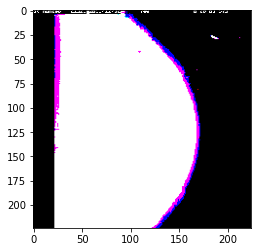

In [6]:
sample_data, sample_label = next(iter(train_loader))

print("sample_data : ", sample_data.size())
print("sample_label : ", sample_label.size())

from src.utils.utility import show_frame

sample_img = sample_data[0,:,0,:,:]
show_frame(sample_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


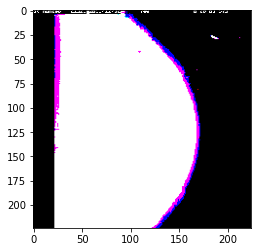

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


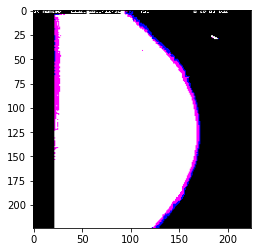

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


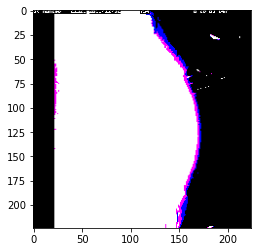

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


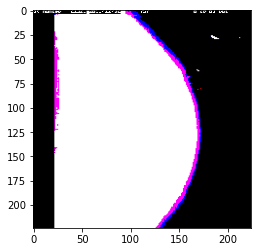

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


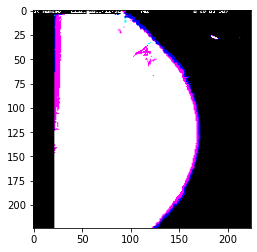

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


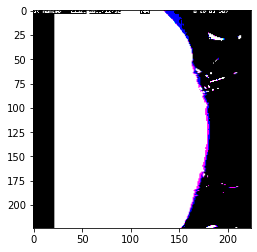

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


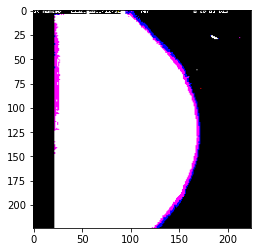

In [11]:
import numpy as np

for idx in np.arange(0, clip_len, 3):
    sample_img = sample_data[0, :, idx, :, :]
    show_frame(sample_img)

dataset :  torch.Size([80, 3, 21, 224, 224])
torch device avaliable :  True
torch current device :  0
torch device num :  2


ViViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b t c (h p1) (w p2) -> b t (h w) (p1 p2 c)', p1=16, p2=16)
    (1): Linear(in_features=768, out_features=64, bias=True)
  )
  (space_transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): PreNorm(
          (fn): Attention(
            (to_qkv): Linear(in_features=64, out_features=768, bias=False)
            (to_out): Sequential(
              (0): Linear(in_features=256, out_features=64, bias=True)
              (1): Dropout(p=0.25, inplace=False)
            )
          )
          (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (1): PreNorm(
          (fn): FeedForward(
            (net): Sequential(
              (0): Linear(in_features=64, out_features=256, bias=True)
              (1): GELU()
              (2): Dropout(p=0.25, inplace=False)
              (3): Linear(in_features=256, out_features=64, bias=True)
              (4): Dropout(p=0.25, inplace

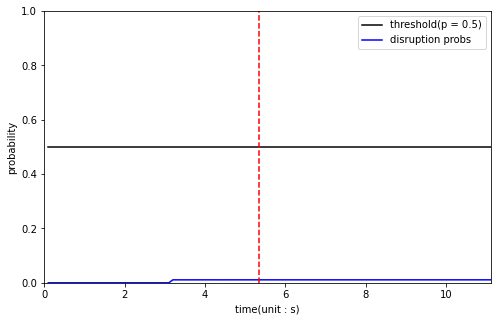

In [2]:
from src.utils.utility import generate_prob_curve, video2tensor

video_path = "./dataset/raw_videos/raw_videos/021274tv01.avi"
shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List.csv"
shot_number = 21274

video_path = "./dataset/raw_videos/raw_videos/021310tv01.avi"
shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List.csv"
shot_number = 21310

clip_len = 21

dataset = video2tensor(
    dir = video_path,
    channels  = 3, 
    clip_len  = clip_len, 
    crop_size  = 224,
    resize_width  = 256,
    resize_height = 256,
    use_continuous_frame = False
)

print("dataset : ", dataset.size())

import torch

# torch device state
print("torch device avaliable : ", torch.cuda.is_available())
print("torch current device : ", torch.cuda.current_device())
print("torch device num : ", torch.cuda.device_count())

# torch cuda initialize and clear cache
torch.cuda.init()
torch.cuda.empty_cache()

# device allocation
if(torch.cuda.device_count() >= 1):
    device = "cuda:0"
else:
    device = 'cpu'

from src.models.ViViT import ViViT

model = ViViT(
    image_size = 224,
    patch_size = 16,
    n_classes = 2,
    n_frames = clip_len,
    dim = 64,
    depth = 4,
    n_heads = 4,
    pool = "cls",
    in_channels = 3,
    d_head = 64,
    dropout = 0.25,
    embedd_dropout=0.25,
    scale_dim = 4
)

weight = "./weights/ViViT_clip_21_dist_10_last.pt"
model.load_state_dict(torch.load(weight))

probs = generate_prob_curve(dataset, model, batch_size = 16, device = device, shot_list_dir = shot_list_dir, shot_number = shot_number, clip_len = 21, dist_frame = 10, use_continuous_frame = False)
model.cpu()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


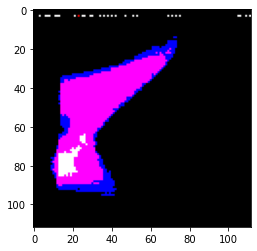

In [27]:
import matplotlib.pyplot as plt
plt.imshow(dataset[1100,:,30,:,:].numpy().transpose(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

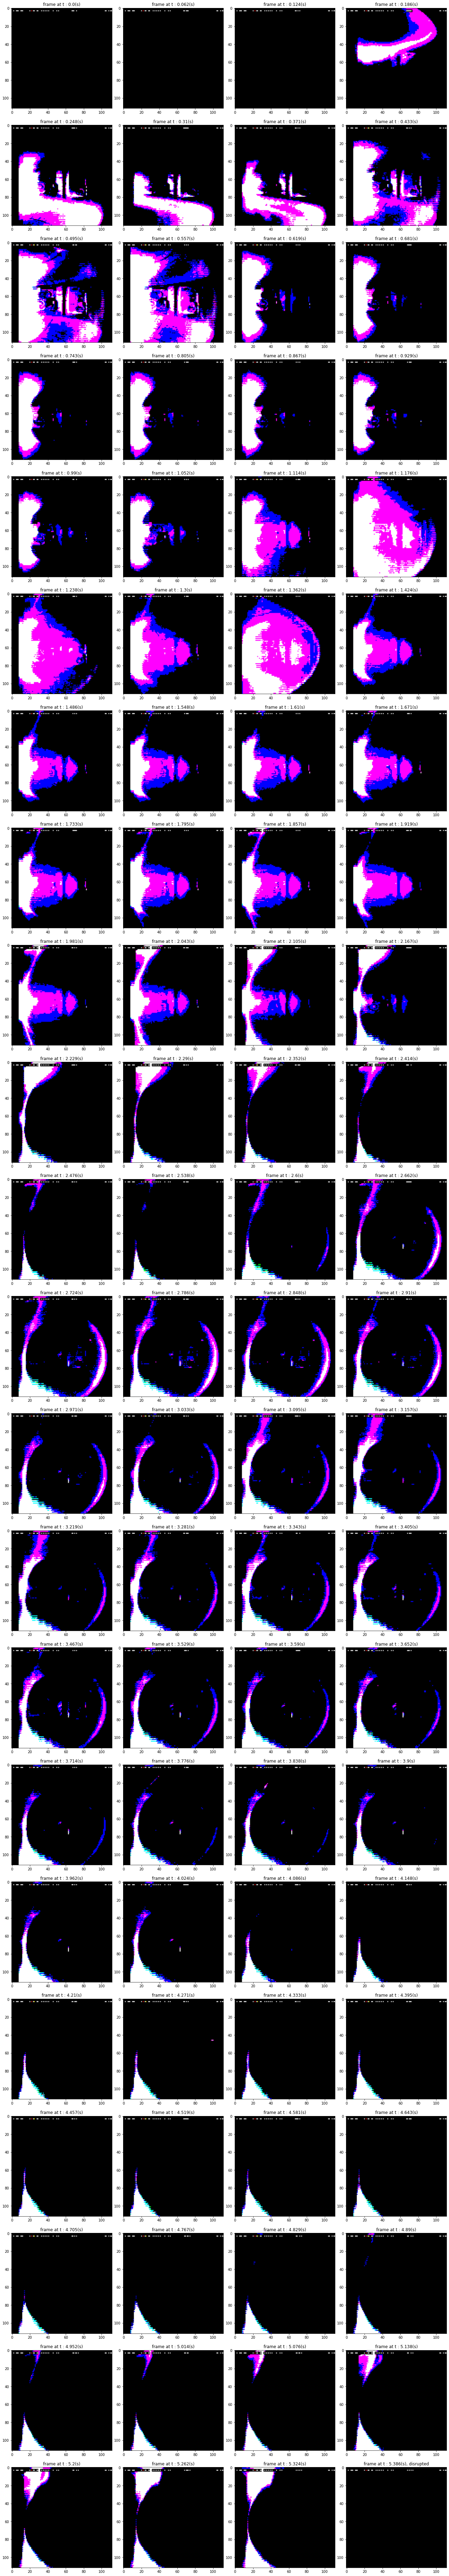

In [2]:
from src.visualization.visualize_video import show_all_frame

video_path = "./dataset/raw_videos/raw_videos/021310tv01.avi"
shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List.csv"
shot_number = 21310

show_all_frame(
    dir = video_path, 
    shot_list_dir = shot_list_dir,
    shot_number = shot_number,
    t_start = 0, 
    t_end = None, 
    t_interval = 0.0625,
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

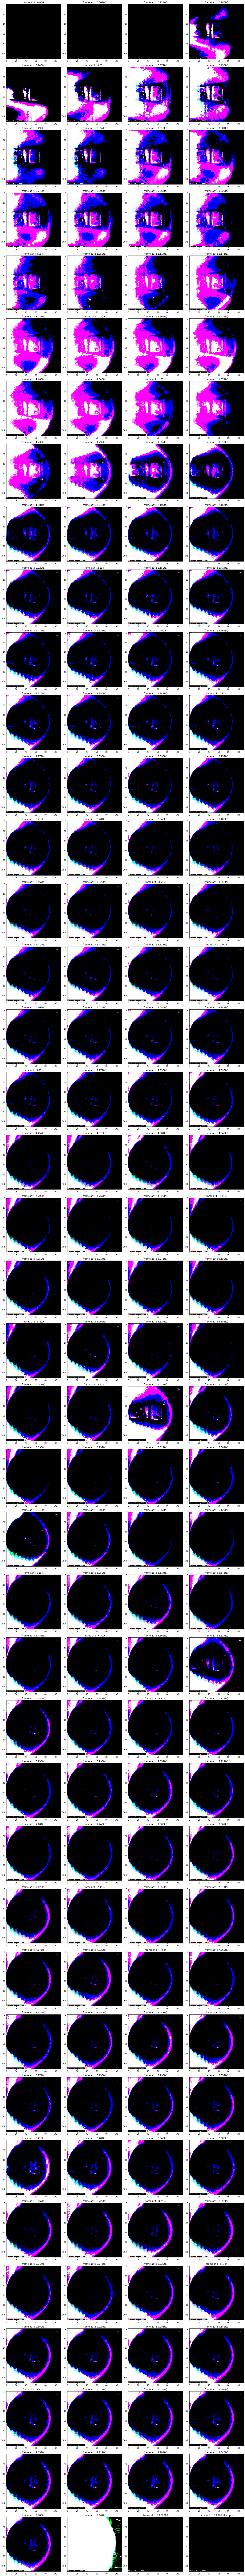

In [2]:
from src.visualization.visualize_video import show_all_frame

video_path = "./dataset/raw_videos/raw_videos/021274tv01.avi"
shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List.csv"
shot_number = 21274

show_all_frame(
    dir = video_path, 
    shot_list_dir = shot_list_dir,
    shot_number = shot_number,
    t_start = 0, 
    t_end = 3, 
    t_interval = 0.0625,
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

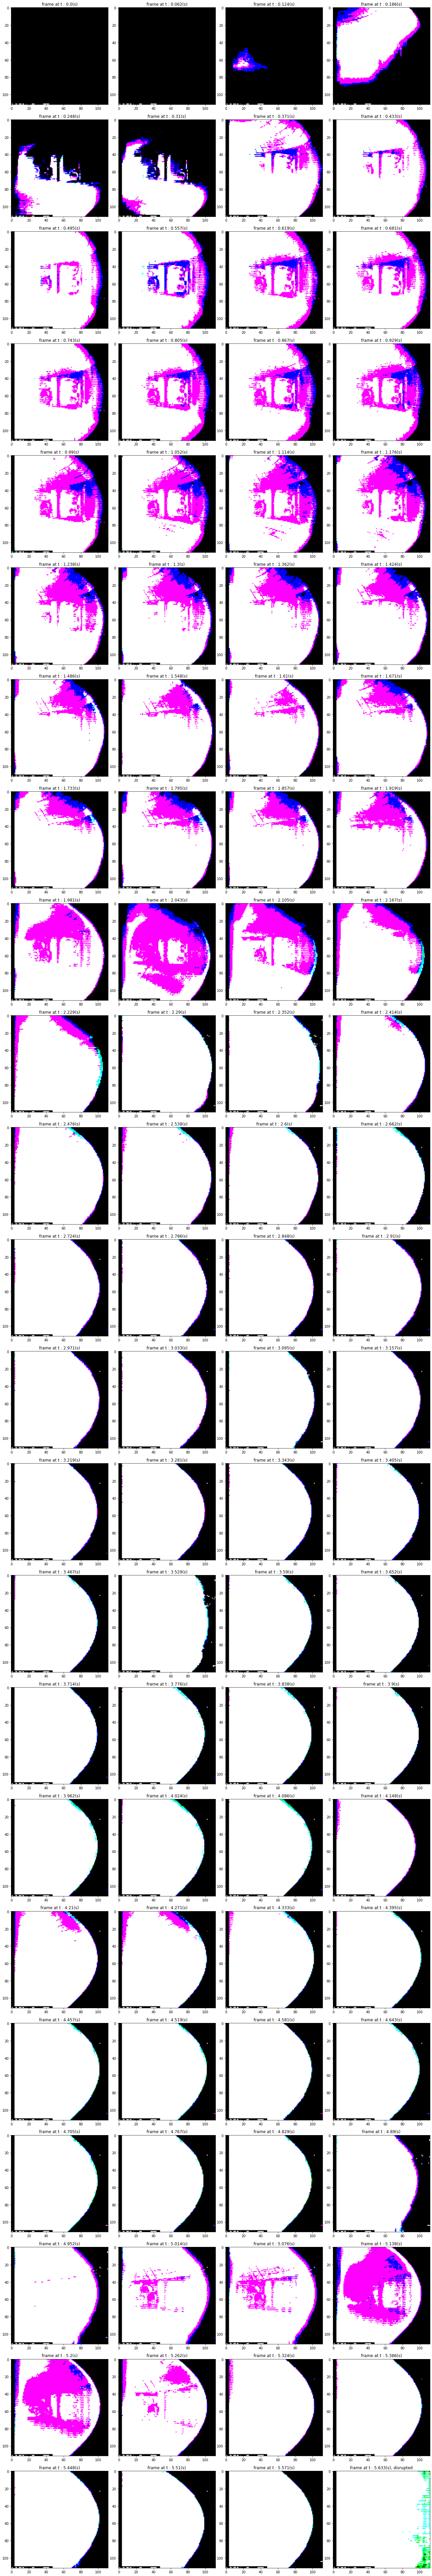

In [5]:
from src.visualization.visualize_video import show_all_frame

video_path = "./dataset/raw_videos/raw_videos/021367tv01.avi"
shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List.csv"
shot_number = 21367

show_all_frame(
    dir = video_path, 
    shot_list_dir = shot_list_dir,
    shot_number = shot_number,
    t_start = 0, 
    t_end = None, 
    t_interval = 0.0625,
)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_functional_video.py:5: UserWarning: The _functional_video module is deprecated. Please use the functional module instead.
  warnings.warn(
/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_transforms_video.py:25: UserWarning: The _transforms_video module is deprecated. Please use the transforms module instead.
  warnings.warn(


dataset :  torch.Size([2269, 3, 42, 112, 112])
torch device avaliable :  True
torch current device :  0
torch device num :  2


SBERTDisruptionClassifier(
  (spatio_encoder): SITSBertSpatialEncoder(
    (resnet): ResNet50(
      (layer0): Sequential(
        (0): Conv3d(3, 32, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))
        (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1), dilation=1, ceil_mode=False)
      )
      (layer1): Sequential(
        (0): Bottleneck2DPlus1D(
          (conv1): Conv3d(32, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
          (bn1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv3d(32, 32, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=False)
          (bn2): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv3d(32, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
         

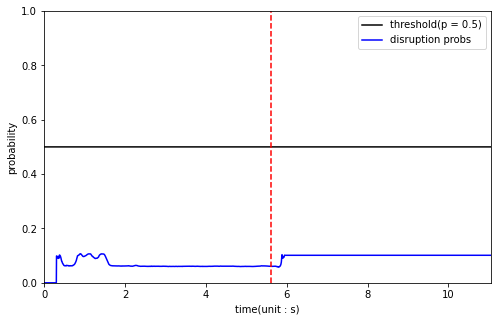

In [1]:
import gc
from src.utils.utility import generate_prob_curve, video2tensor

gc.collect()

video_path = "./dataset/raw_videos/raw_videos/021367tv01.avi"
shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List.csv"
shot_number = 21367
clip_len = 42
dist_frame = 21

dataset = video2tensor(
    video_path,
    3,
    clip_len,
    112,
)

# dataset = dataset[:,:,0::2,:,:]

print("dataset : ", dataset.size())

import torch

# torch device state
print("torch device avaliable : ", torch.cuda.is_available())
print("torch current device : ", torch.cuda.current_device())
print("torch device num : ", torch.cuda.device_count())

# torch cuda initialize and clear cache
torch.cuda.init()
torch.cuda.empty_cache()

# device allocation
if(torch.cuda.device_count() >= 1):
    device = "cuda:0"
else:
    device = 'cpu'

from src.models.model import SITSBertSpatialEncoder, SBERTDisruptionClassifier
from src.models.transformer import SBERT

video_encoder = SITSBertSpatialEncoder(
    input_shape = (3, clip_len, 112, 112), # input_shape  = (3, int(clip_len / 2) + 1, 112, 112),
    alpha  = 2,
    layers = [1,2,2,1]
)
    
num_features = video_encoder.get_output_size()[-1]
temporal_encoder = SBERT(
    num_features = num_features, #18432,
    hidden = 128,
    n_layers = 4,
    attn_heads = 8, 
    max_len  = clip_len
)

model = SBERTDisruptionClassifier(
    spatio_encoder = video_encoder, 
    sbert = temporal_encoder, 
    mlp_hidden = 128, 
    num_classes = 2
)

weight = "./weights/sbert_clip_42_dis_21_no_sampler_best.pt"
model.load_state_dict(torch.load(weight))
# probs = generate_prob_curve(dataset, model, batch_size = 16, device = device, shot_list_dir = shot_list_dir, shot_number = shot_number, clip_len = int(clip_len / 2) + 1, dist_frame = dist_frame)
probs = generate_prob_curve(dataset, model, batch_size = 16, device = device, shot_list_dir = shot_list_dir, shot_number = shot_number, clip_len = clip_len, dist_frame = dist_frame)

model.cpu()